# Importando os dados
Os dados são um exemplo de série temporal

In [1]:
import pandas as pd 

uri = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"

df = pd.read_csv(uri)

df.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


# Setando os tamanhos e fontes de todos os gráficos

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

# Gerando o gráfico dos dados importados

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

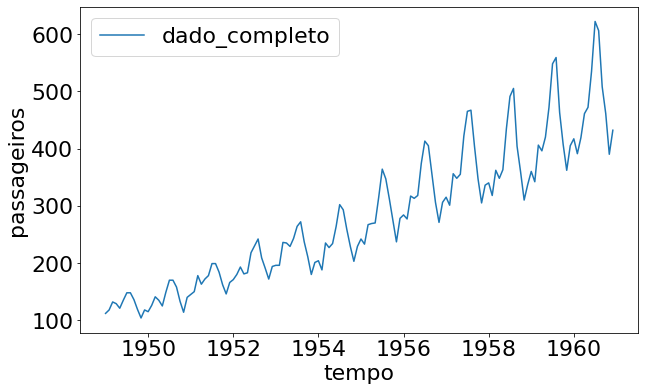

In [3]:
import seaborn as sns

sns.lineplot(x='tempo', y='passageiros', data= df, label='dado_completo')

# Escalonando os dados importados

Nota: É importante escalar os dados para que a rede neural consiga aprende a relação entre entrada e saída.

In [4]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
escalador.fit(df)
dados_escalados = escalador.transform(df)

# Atribuindo os dados escalonados a novas variáveis

In [5]:
x = dados_escalados[:,0]
y = dados_escalados[:,1]
x.shape

(144,)

# Plotando o gráfico dos dados escalonados

Text(0, 0.5, 'Passageiros')

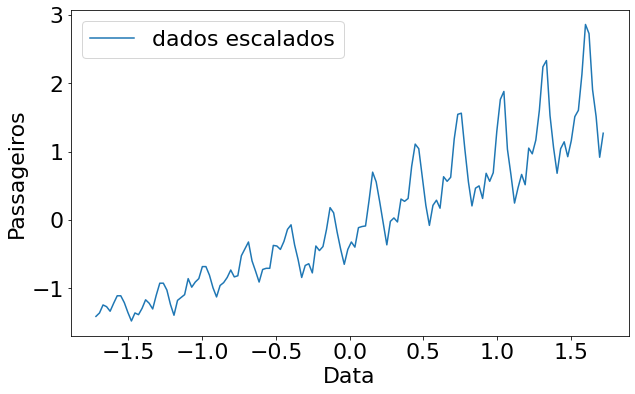

In [6]:
sns.lineplot(x=x, y=y, label='dados escalados')
plt.xlabel('Data')
plt.ylabel('Passageiros')

# Dividindo os dados para treino e para teste

In [7]:
tamanho_treino = int(len(df)*0.9) # Selecionando 90% dos dados para treino
tamanho_teste =  len(df) - tamanho_treino #Seleionando o restante para teste

#Atribuindo os dados de treino para novas variáveis
treino_x = x[0:tamanho_treino] 
treino_y = y[0:tamanho_treino]

#Atribuindo os dados de teste para novas variáveis
teste_x = x[tamanho_treino:len(df)]
teste_y = y[tamanho_treino:len(df)]

# Plotando o gráfico dos dados já divididos em treino e teste

Text(0, 0.5, 'Passageiros')

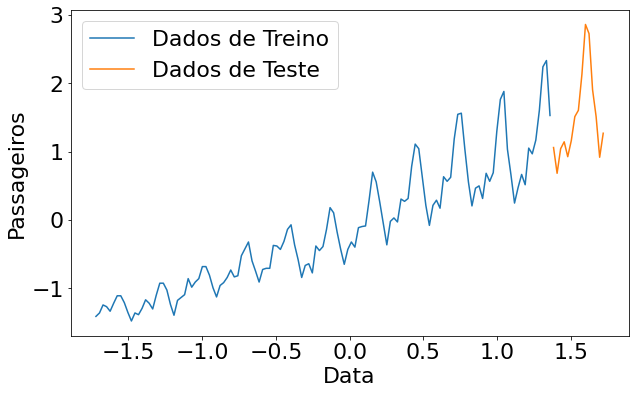

In [8]:
sns.lineplot(x=treino_x, y= treino_y, label='Dados de Treino')
sns.lineplot(x=teste_x, y=teste_y, label='Dados de Teste')

plt.xlabel('Data')
plt.ylabel('Passageiros')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicializando o modelo

In [10]:
regressor = Sequential() 

# Adicionando as camadas à rede

In [11]:
regressor.add(Dense(1, #Pq só temos uma entada e está ligada a um único neurônio que é o da camada de saída
                   input_dim = 1, #Dimensão da entrada (só temos uma, a data)
                   kernel_initializer = 'ones',  #inicializando os pesos com 1
                   activation = 'linear', #ativação linear 
                   use_bias = False)) #desativa os vieses

# Compilando o modelo

In [12]:
regressor.compile(loss='mean_squared_error', #inicializa o erro médio quadrático
                 optimizer = 'adam')

In [13]:
regressor.summary() # vendo informações do modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


# Aplicando os dados de treino no modelo

In [14]:
regressor.fit(treino_x, treino_y)  #Refinando os dados de treino como o modelo de regressão

Train on 129 samples
129/129 [==============================] - 0s 1ms/sample - loss: 0.1285


# Fazendo a estimativa do treino

In [15]:
previsao_y = regressor.predict(treino_x)

# Plotando os dados de treino e sua estimativo após regressão linear

<AxesSubplot:>

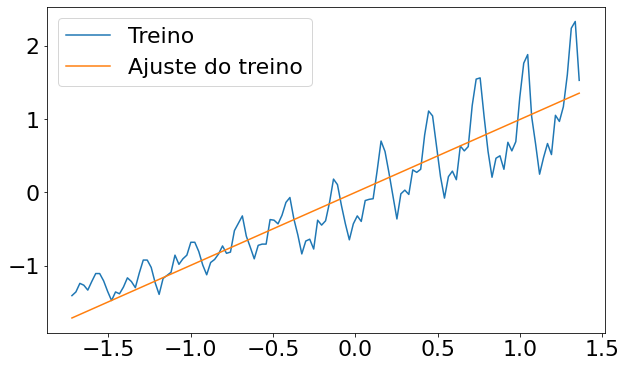

In [24]:
sns.lineplot(x=treino_x, y= treino_y, label= 'Treino')
sns.lineplot(x=treino_x, y=previsao_y[:,0],  label= 'Ajuste do treino')

# Criando um DF com os dados e as estimativas de treino

In [17]:
dados_treino = {'tempo':treino_x, 'passageiros':previsao_y[:,0]} #dados treino escalonados e com a estimavitva
dados_treino_df = pd.DataFrame(data=dados_treino)
dados_treino_df.head()

,tempo,passageiros
0,-1.720064,-1.712541
1,-1.696007,-1.688589
2,-1.671950,-1.664637
3,-1.647894,-1.640686
4,-1.623837,-1.616734


# Reescalonando os dados treino

In [18]:
dados_treino_originais = escalador.inverse_transform(dados_treino_df) #Fazendo os valores sendo iguais ao da fonte de dados
dados_treino_originais_df = pd.DataFrame(dados_treino_originais)
dados_treino_originais_df.columns=['tempo', 'passageiros'] #Nomeando as colunas do DataFrame
dados_treino_originais_df.head()

,tempo,passageiros
0,1949.000000,75.566006
1,1949.083333,78.429389
2,1949.166667,81.292800
3,1949.250000,84.156182
4,1949.333333,87.019579


# Plotando os dados

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

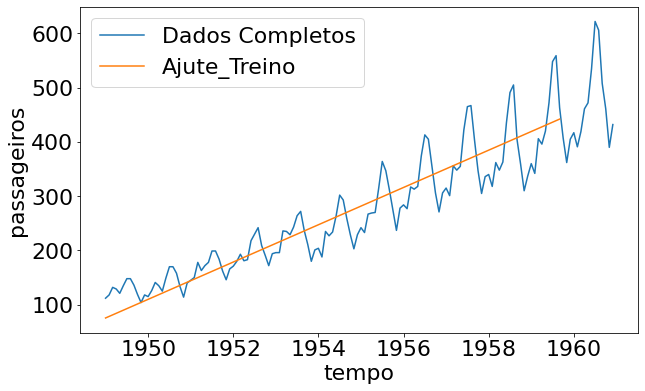

In [19]:
sns.lineplot(x = 'tempo', y = 'passageiros', data=df, label = "Dados Completos"  )
sns.lineplot(x='tempo', y='passageiros', data = dados_treino_originais_df, label = "Ajute_Treino")

# Criando um DF com os dados e as estimativas de teste

In [20]:
previsao_teste = regressor.predict(teste_x)
dados_teste = {'tempo': teste_x, 'passageiros':previsao_teste[:,0]}
dados_teste_df = pd.DataFrame(data=dados_teste)
dados_teste_orginais = escalador.inverse_transform(dados_teste_df)
dados_teste_originais_df = pd.DataFrame(data=dados_teste_orginais)
dados_teste_originais_df.columns = ['tempo', 'passageiros']
dados_teste_originais_df.head()

,tempo,passageiros
0,1959.750000,444.943718
1,1959.833333,447.807115
2,1959.916667,450.670497
3,1960.000000,453.533880
4,1960.083333,456.397291


# Plotando os dados de treino, teste e completos

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

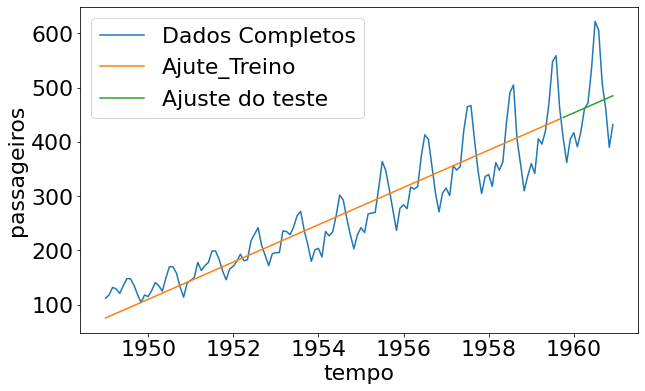

In [22]:
sns.lineplot(x = 'tempo', y = 'passageiros', data=df, label = "Dados Completos"  )
sns.lineplot(x='tempo', y='passageiros', data = dados_treino_originais_df, label = "Ajute_Treino")
sns.lineplot(x='tempo', y='passageiros',  data = dados_teste_originais_df, label= 'Ajuste do teste')

# Criando novo modelo com mais camadas

In [44]:
regressor2 = Sequential() #definindo a rede neural

#Primeira camada escondida
regressor2.add(Dense(8, #define para 8 neurônios
                    input_dim=1,
                    kernel_initializer = 'random_uniform', #Pesos aleatórios numa distribuição uniforme
                    activation = 'sigmoid', 
                    use_bias = False))

In [45]:
#Segunda camada escondida
regressor2.add(Dense(8, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias=False))

In [46]:
#Camada de Saída
regressor2.add(Dense(1, kernel_initializer = 'random_uniform',
                    activation = 'linear', use_bias=False))

In [47]:
regressor2.compile(loss='mean_squared_error', optimizer = 'adam')
regressor2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


# Treinando o novo modelo

In [48]:
regressor2.fit(treino_x, treino_y, epochs=500)

Train on 129 samples
Epoch 1/500
129/129 [==============================] - 0s 2ms/sample - loss: 0.8215
Epoch 2/500
129/129 [==============================] - 0s 39us/sample - loss: 0.8159
Epoch 3/500
129/129 [==============================] - 0s 46us/sample - loss: 0.8112
Epoch 4/500
129/129 [==============================] - 0s 31us/sample - loss: 0.8055
Epoch 5/500
129/129 [==============================] - 0s 39us/sample - loss: 0.8003
Epoch 6/500
129/129 [==============================] - 0s 39us/sample - loss: 0.7981
Epoch 7/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7957
Epoch 8/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7942
Epoch 9/500
129/129 [==============================] - 0s 39us/sample - loss: 0.7935
Epoch 10/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7913
Epoch 11/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7894
Epoch 12/500
129/129 [=====================

129/129 [==============================] - 0s 31us/sample - loss: 0.7606
Epoch 97/500
129/129 [==============================] - 0s 38us/sample - loss: 0.7602
Epoch 98/500
129/129 [==============================] - 0s 39us/sample - loss: 0.7596
Epoch 99/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7591
Epoch 100/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7589
Epoch 101/500
129/129 [==============================] - 0s 38us/sample - loss: 0.7581
Epoch 102/500
129/129 [==============================] - 0s 41us/sample - loss: 0.7576
Epoch 103/500
129/129 [==============================] - 0s 35us/sample - loss: 0.7570
Epoch 104/500
129/129 [==============================] - 0s 39us/sample - loss: 0.7566
Epoch 105/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7561
Epoch 106/500
129/129 [==============================] - 0s 31us/sample - loss: 0.7556
Epoch 107/500
129/129 [==============================] - 0s 

129/129 [==============================] - 0s 31us/sample - loss: 0.6936
Epoch 191/500
129/129 [==============================] - 0s 38us/sample - loss: 0.6928
Epoch 192/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6920
Epoch 193/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6913
Epoch 194/500
129/129 [==============================] - 0s 31us/sample - loss: 0.6905
Epoch 195/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6898
Epoch 196/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6889
Epoch 197/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6880
Epoch 198/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6875
Epoch 199/500
129/129 [==============================] - 0s 31us/sample - loss: 0.6870
Epoch 200/500
129/129 [==============================] - 0s 39us/sample - loss: 0.6856
Epoch 201/500
129/129 [==============================] - 

129/129 [==============================] - 0s 37us/sample - loss: 0.5945
Epoch 285/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5932
Epoch 286/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5921
Epoch 287/500
129/129 [==============================] - 0s 31us/sample - loss: 0.5911
Epoch 288/500
129/129 [==============================] - 0s 31us/sample - loss: 0.5899
Epoch 289/500
129/129 [==============================] - 0s 31us/sample - loss: 0.5891
Epoch 290/500
129/129 [==============================] - 0s 34us/sample - loss: 0.5881
Epoch 291/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5873
Epoch 292/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5864
Epoch 293/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5855
Epoch 294/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5845
Epoch 295/500
129/129 [==============================] - 

129/129 [==============================] - 0s 39us/sample - loss: 0.5008
Epoch 379/500
129/129 [==============================] - 0s 39us/sample - loss: 0.5000
Epoch 380/500
129/129 [==============================] - 0s 39us/sample - loss: 0.4990
Epoch 381/500
129/129 [==============================] - 0s 39us/sample - loss: 0.4985
Epoch 382/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4975
Epoch 383/500
129/129 [==============================] - 0s 39us/sample - loss: 0.4963
Epoch 384/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4953
Epoch 385/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4942
Epoch 386/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4928
Epoch 387/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4906
Epoch 388/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4898
Epoch 389/500
129/129 [==============================] - 

129/129 [==============================] - 0s 39us/sample - loss: 0.4140
Epoch 473/500
129/129 [==============================] - 0s 39us/sample - loss: 0.4136
Epoch 474/500
129/129 [==============================] - 0s 38us/sample - loss: 0.4131
Epoch 475/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4122
Epoch 476/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4105
Epoch 477/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4088
Epoch 478/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4076
Epoch 479/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4064
Epoch 480/500
129/129 [==============================] - 0s 39us/sample - loss: 0.4042
Epoch 481/500
129/129 [==============================] - 0s 31us/sample - loss: 0.4042
Epoch 482/500
129/129 [==============================] - 0s 38us/sample - loss: 0.4034
Epoch 483/500
129/129 [==============================] - 

# Fazendo a estimativa do treino e teste

In [49]:
previsao_y = regressor2.predict(treino_x)
previsao_teste = regressor2.predict(teste_x)

<AxesSubplot:>

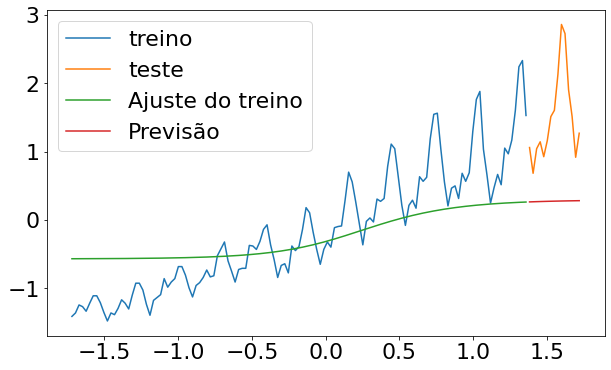

In [50]:
sns.lineplot(x=treino_x, y = treino_y, label='treino')
sns.lineplot(x=teste_x, y = teste_y, label='teste')
sns.lineplot(x=treino_x, y=previsao_y[:,0],  label= 'Ajuste do treino')
sns.lineplot(x=teste_x, y=previsao_teste[:,0],  label= 'Previsão')